In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 43.8 MB/s eta 0:00:00


In [1]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch

In [2]:
if torch.cuda.is_available():
    print(f"Available GPU: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPU: {torch.cuda.device_count()}")
    print(f"CUDA version: {torch.version.cuda}")
else:
    print("GPU not available, using CPU.")

Available GPU: Tesla P100-PCIE-16GB
Number of GPU: 1
CUDA version: 12.1


In [3]:
!nvidia-smi

Wed Mar 19 03:44:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             25W /  250W |       3MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

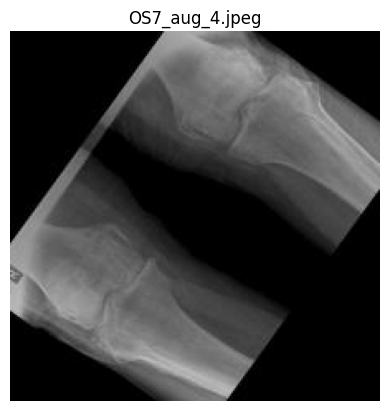

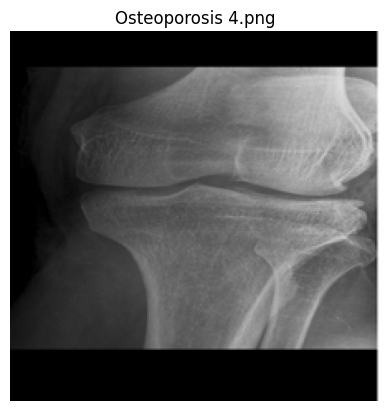

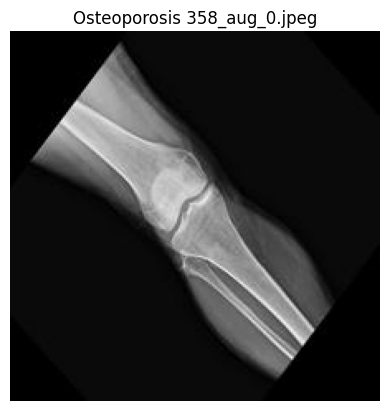

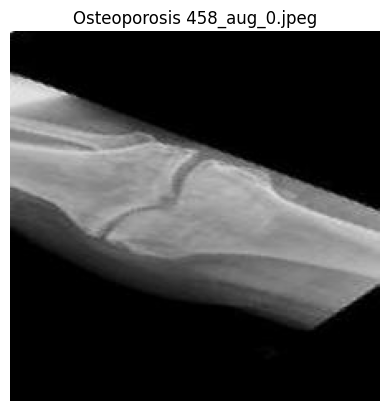

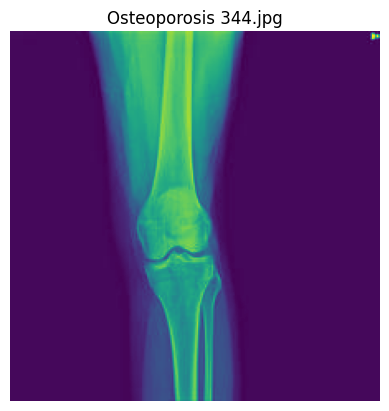

In [4]:
# Specify the directory containing the images
image_dir = '/kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/train/Osteoporosis'

# Get a list of files in the directory
file_list = os.listdir(image_dir)

# Filter out only image files (e.g., with extensions .png, .jpg, .jpeg)
image_files = [f for f in file_list if f.endswith(('.png', '.jpg', '.jpeg'))]

# Select the first 5 image files
image_files = image_files[:5]

# Plot each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)

    # Load the image
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure()
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')  # Hide axis
    plt.show()

In [5]:
import cv2
# Load the image
image = cv2.imread("/kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test/Osteopenia/OP104.jpg")

# Get the size (height, width, channels)
height, width, channels = image.shape

# Print the size
print(f"Image size: {width} x {height}")

Image size: 224 x 224


In [8]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m-cls.pt') # load a pretrained model (recommended for training)

# Train the model
model.train(data='/kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification',
            epochs=100,
            imgsz=224,
            val=True,
            # dropout=0.2,
            # optimizer='AdamW',
            # scale=0.7,
            # lr0=0.001,
            batch=64,
            device='cuda')

# !yolo task=classify mode=train model=yolov8n-cls.pt data='/kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification' epochs=5 imgsz=224

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 32.7M/32.7M [00:00<00:00, 45.8MB/s]


Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification, epochs=100, time=None, patience=100, batch=64, imgsz=224, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

100%|██████████| 5.35M/5.35M [00:00<00:00, 239MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/train... 3780 images, 0 corrupt: 100%|██████████| 3780/3780 [00:07<00:00, 487.06it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification is not writeable, cache not saved.


val: Scanning /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/val... 1080 images, 0 corrupt: 100%|██████████| 1080/1080 [00:02<00:00, 489.97it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification is not writeable, cache not saved.


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 4 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      2.65G      1.138         64        224:  13%|█▎        | 8/60 [00:01<00:10,  4.99it/s]

      1/100      2.65G      1.123         64        224:  23%|██▎       | 14/60 [00:03<00:08,  5.27it/s]
100%|██████████| 755k/755k [00:00<00:00, 91.9MB/s]
      1/100      2.67G     0.9231          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00,  9.63it/s]

                   all      0.621          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      2.67G     0.7822          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.689          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      2.67G     0.7655          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.656          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      2.67G     0.7668          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]

                   all      0.723          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      2.67G     0.7254          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.74it/s]

                   all      0.589          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      2.67G     0.7293          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.717          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      2.67G     0.6973          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]

                   all       0.69          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      2.67G     0.7031          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.701          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      2.67G     0.6833          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.706          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      2.67G     0.6786          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.73it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      2.67G     0.6595          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.76it/s]

                   all      0.724          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      2.67G     0.6657          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.58it/s]

                   all      0.589          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      2.67G     0.7263          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.688          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      2.67G     0.6758          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.63it/s]

                   all      0.659          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      2.67G     0.6435          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.701          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      2.67G     0.6855          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.74it/s]

                   all      0.649          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      2.67G     0.6297          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.57it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      2.67G     0.6365          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.71it/s]

                   all      0.643          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      2.67G     0.6015          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.32it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      2.67G      0.632          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.67it/s]

                   all      0.624          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      2.67G     0.5941          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.725          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      2.67G     0.5907          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.60it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      2.67G      0.586          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.72it/s]

                   all      0.719          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      2.67G     0.5694          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]

                   all      0.666          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      2.67G     0.5571          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.72it/s]

                   all      0.765          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      2.67G     0.5518          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.72it/s]

                   all      0.675          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      2.67G      0.576          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]

                   all      0.736          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      2.67G     0.5189          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.77it/s]

                   all       0.71          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      2.67G     0.5416          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]

                   all      0.708          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      2.67G     0.5244          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.68it/s]

                   all      0.702          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      2.67G     0.5392          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.727          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      2.67G     0.5328          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.68it/s]

                   all      0.729          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      2.67G     0.4748          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.755          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      2.67G     0.4618          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.46it/s]

                   all      0.772          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      2.67G     0.4757          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.73it/s]

                   all      0.744          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      2.67G     0.4508          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.737          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      2.67G     0.4721          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.64it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      2.67G      0.445          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.73it/s]

                   all      0.767          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      2.67G     0.4549          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.36it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      2.67G     0.4858          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.73it/s]

                   all      0.779          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      2.67G     0.4437          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all       0.76          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      2.67G     0.4394          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.67it/s]

                   all      0.768          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      2.67G     0.4434          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.71it/s]

                   all       0.74          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      2.67G     0.3932          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.62it/s]

                   all      0.742          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      2.67G     0.4253          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.72it/s]

                   all       0.74          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      2.67G     0.4347          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.74it/s]

                   all      0.781          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      2.67G     0.3918          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]

                   all      0.785          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      2.67G     0.3817          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.64it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      2.67G     0.4381          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.68it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      2.67G     0.4426          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.75it/s]

                   all      0.736          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      2.67G      0.413          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.67it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      2.67G     0.3799          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.62it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      2.67G      0.375          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.74it/s]

                   all       0.79          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      2.67G     0.3521          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.76it/s]

                   all      0.816          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      2.67G     0.3583          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.72it/s]

                   all      0.772          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      2.67G     0.3417          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      2.67G     0.3247          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      2.67G     0.3199          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.71it/s]

                   all      0.814          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      2.67G      0.356          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      2.67G     0.3244          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.62it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      2.67G     0.3301          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.61it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      2.67G     0.3634          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.64it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      2.67G     0.3603          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.819          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      2.67G     0.3355          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.74it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      2.67G     0.3055          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]

                   all      0.805          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      2.67G     0.2872          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.72it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      2.67G     0.3025          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.64it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      2.67G     0.3228          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      2.67G     0.3086          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.809          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      2.67G     0.3118          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.63it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      2.67G     0.2935          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      2.67G      0.284          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.809          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      2.67G     0.2717          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      2.67G     0.2747          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.77it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      2.67G     0.2725          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.58it/s]

                   all      0.819          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      2.67G      0.288          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      2.67G      0.284          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.61it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      2.67G     0.2936          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.75it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      2.67G     0.2763          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      2.67G      0.283          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.56it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      2.67G     0.2664          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      2.67G     0.2551          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.64it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      2.67G     0.2411          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.71it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      2.67G     0.2288          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.75it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      2.67G     0.2308          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.58it/s]

                   all      0.849          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      2.67G     0.2445          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.73it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      2.67G     0.2497          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      2.67G     0.2304          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.72it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      2.67G     0.2258          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.76it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      2.67G      0.217          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      2.67G     0.1961          4        224: 100%|██████████| 60/60 [00:12<00:00,  4.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.56it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      2.67G     0.2277          4        224: 100%|██████████| 60/60 [00:12<00:00,  4.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.68it/s]

                   all      0.847          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      2.67G     0.2296          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.62it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      2.67G     0.2236          4        224: 100%|██████████| 60/60 [00:12<00:00,  4.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.59it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      2.67G     0.2221          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.63it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      2.67G     0.2482          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.63it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      2.67G     0.2059          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.49it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      2.67G     0.2113          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      2.67G     0.2087          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      2.67G     0.2028          4        224: 100%|██████████| 60/60 [00:11<00:00,  5.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.59it/s]

                   all      0.844          1



100 epochs completed in 0.362 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train/weights/best.pt, 31.7MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/train... found 3780 images in 3 classes ✅ 
val: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/val... found 1080 images in 3 classes ✅ 
test: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test... found 540 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:01<00:00,  8.55it/s]


                   all      0.851          1
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aed0ac1e020>
curves: []
curves_results: []
fitness: 0.9254629611968994
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8509259223937988, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9254629611968994}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.06910618148207572, 'inference': 0.71461720277739, 'loss': 0.00018863981444560018, 'postprocess': 0.00647574351862406}
task: 'classify'
top1: 0.8509259223937988
top5: 1.0

In [9]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/train... found 3780 images in 3 classes ✅ 
val: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/val... found 1080 images in 3 classes ✅ 
test: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test... found 540 images in 3 classes ✅ 


val: Scanning /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/val... 1080 images, 0 corrupt: 100%|██████████| 1080/1080 [00:00<00:00, 1148.21it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification is not writeable, cache not saved.



               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:01<00:00,  8.61it/s]


                   all      0.851          1
Speed: 0.3ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aeba772f5e0>
curves: []
curves_results: []
fitness: 0.9254629611968994
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8509259223937988, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9254629611968994}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.2846585657401327, 'inference': 0.8797162768511649, 'loss': 0.001721532407406846, 'postprocess': 0.012323628703193713}
task: 'classify'
top1: 0.8509259223937988
top5: 1.0


In [10]:
results = model('/kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test/Normal/N34.jpg')
print(results)


image 1/1 /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test/Normal/N34.jpg: 224x224 Normal 0.99, Osteopenia 0.00, Osteoporosis 0.00, 4.3ms
Speed: 12.7ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Normal', 1: 'Osteopenia', 2: 'Osteoporosis'}
obb: None
orig_img: array([[[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [  0,   0,   0],
        [ 18,  18,  18],
        [  1,   1,   1]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [  5,   5,   5],
        [ 39,  39,  39],
        [  6,   6,   6]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [158, 158, 158],
        [247, 247, 247],
        [129, 129, 129]],

       ...,

       [[  2,   2,   2],
      

In [11]:
print(results[0].probs)

ultralytics.engine.results.Probs object with attributes:

data: tensor([0.9926, 0.0049, 0.0025], device='cuda:0')
orig_shape: None
shape: torch.Size([3])
top1: 0
top1conf: tensor(0.9926, device='cuda:0')
top5: [0, 1, 2]
top5conf: tensor([0.9926, 0.0049, 0.0025], device='cuda:0')


In [12]:
# !yolo task=classify mode=val model=/kaggle/working/runs/classify/train4/weights/best.pt data='/kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification'

In [12]:
!yolo task=classify mode=predict model=/kaggle/working/runs/classify/train/weights/best.pt conf=0.25 source="/kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test/Osteopenia/OP145_aug_0.jpeg"

Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs

image 1/1 /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test/Osteopenia/OP145_aug_0.jpeg: 224x224 Osteopenia 0.57, Osteoporosis 0.43, Normal 0.00, 4.0ms
Speed: 6.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


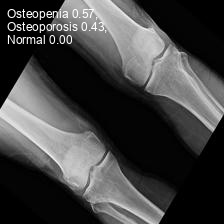

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/classify/predict/OP145_aug_0.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [14]:
import shutil
import os

# Path folder hasil pelatihan 
folder_path = "/kaggle/working/runs"

# Membuat file ZIP dari folder hasil pelatihan
shutil.make_archive("/kaggle/working/runs", 'zip', folder_path)

# Menampilkan link untuk mendownload file ZIP
print("Download ZIP file: runs.zip")

Download ZIP file: runs.zip
